In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import preprocessing

from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
# Wczytajmy dane
df = pd.read_csv(io.BytesIO(uploaded['cars.csv']))
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.iloc[:5,10:26]

,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
continous_cols = ['length',	'width',	'height',	'curb-weight',  'wheel-base',   'bore', 'stroke', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df_no_losses = df.drop(columns='normalized-losses')
# display(df_no_df_no_losses[df_no_losses.isna().any(axis=1)])
display(df_no_losses[df_no_losses.isna().any(axis=1)])
display(df_no_losses[df_no_losses.isna().any(axis=1)][['num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price' ]])

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


,num-of-doors,bore,stroke,horsepower,peak-rpm,price
9,two,3.13,3.4,160,5500,NaN
27,NaN,3.03,3.39,102,5500,8558
44,two,3.03,3.11,70,5400,NaN
45,four,3.03,3.11,70,5400,NaN
55,two,NaN,NaN,101,6000,10945
56,two,NaN,NaN,101,6000,11845
57,two,NaN,NaN,101,6000,13645
58,two,NaN,NaN,135,6000,15645
63,NaN,3.39,3.39,64,4650,10795
129,two,3.94,3.11,288,5750,NaN


In [ ]:
df_no_losses.loc[(df_no_losses['engine-size']>=130)&(df_no_losses['engine-size']<=134)&(df_no_losses['fuel-type']=='gas')&(df_no_losses['aspiration']=='std')]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [ ]:
#for NaNs I'm using values from a car with same fuel-type and aspiration and similar engine-size
horsepower_rep = df_no_losses['horsepower'][0]

df_no_losses['horsepower'][130] = horsepower_rep
df_no_losses['horsepower'][131] = horsepower_rep

peak_rpm_rep = df_no_losses['peak-rpm'][0]

df_no_losses['peak-rpm'][130] = peak_rpm_rep
df_no_losses['peak-rpm'][131] = peak_rpm_rep

<ipython-input-27-dab5a60e8646>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_losses['horsepower'][130] = horsepower_rep
<ipython-input-27-dab5a60e8646>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_losses['horsepower'][131] = horsepower_rep
<ipython-input-27-dab5a60e8646>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_losses['peak-rpm'][130] = peak_rpm_rep
<ipython-input-27-dab5a60e8646>:9: SettingWithCopyWar

In [ ]:
df_no_losses.loc[(df_no_losses['engine-size']>=130)&(df_no_losses['engine-size']<=134)&(df_no_losses['fuel-type']=='gas')&(df_no_losses['aspiration']=='std')]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.9,8.7,111,5000,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.9,8.7,111,5000,23,31,9895


In [ ]:
df_no_losses

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
for col in continous_cols:
  df_no_losses[col] = df_no_losses[col].astype(float)


In [ ]:
# bore & stroke depent od compression-ratio so I drop these columns
df_no_losses.drop(columns=['bore', 'stroke'], inplace=True)


In [ ]:
continous_cols.remove('bore')
continous_cols.remove('stroke')
print(continous_cols)

['length', 'width', 'height', 'curb-weight', 'wheel-base', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [ ]:
df_no_losses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       203 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    float64
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    float64
 16  fuel-system        205 non

In [ ]:
# categorical variables
df['num-of-doors'].fillna('four')

label = preprocessing.LabelEncoder()
train_data_encoded = pd.DataFrame()
categorical_columns = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system']
df_numerical = df.drop(categorical_columns, axis=1)
for i in categorical_columns:
  train_data_encoded[i]=label.fit_transform(df[i])

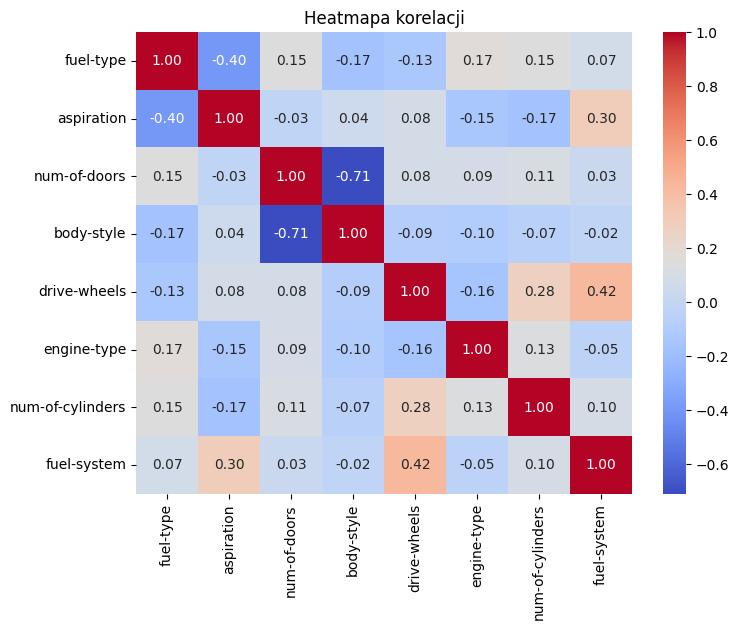

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_data_encoded.corr(method='spearman')

# Stwórz heatmapę korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmapa korelacji")
plt.show()

In [ ]:
train_data_encoded = train_data_encoded.drop(['num-of-doors'], axis=1)

KeyError: ignored

<Axes: xlabel='price', ylabel='Count'>

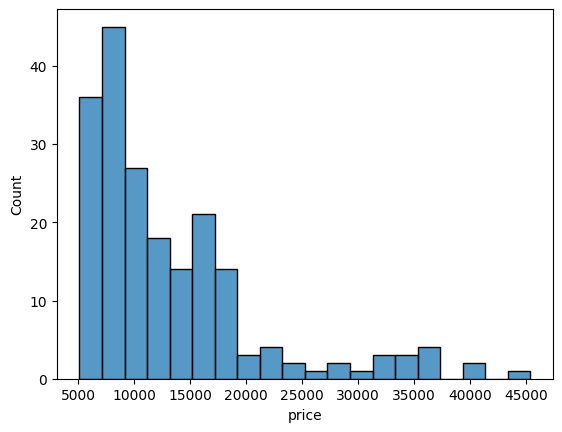

In [ ]:
sns.histplot(df_continous_vars['price'], bins=20)

In [ ]:
right-skewed distribution

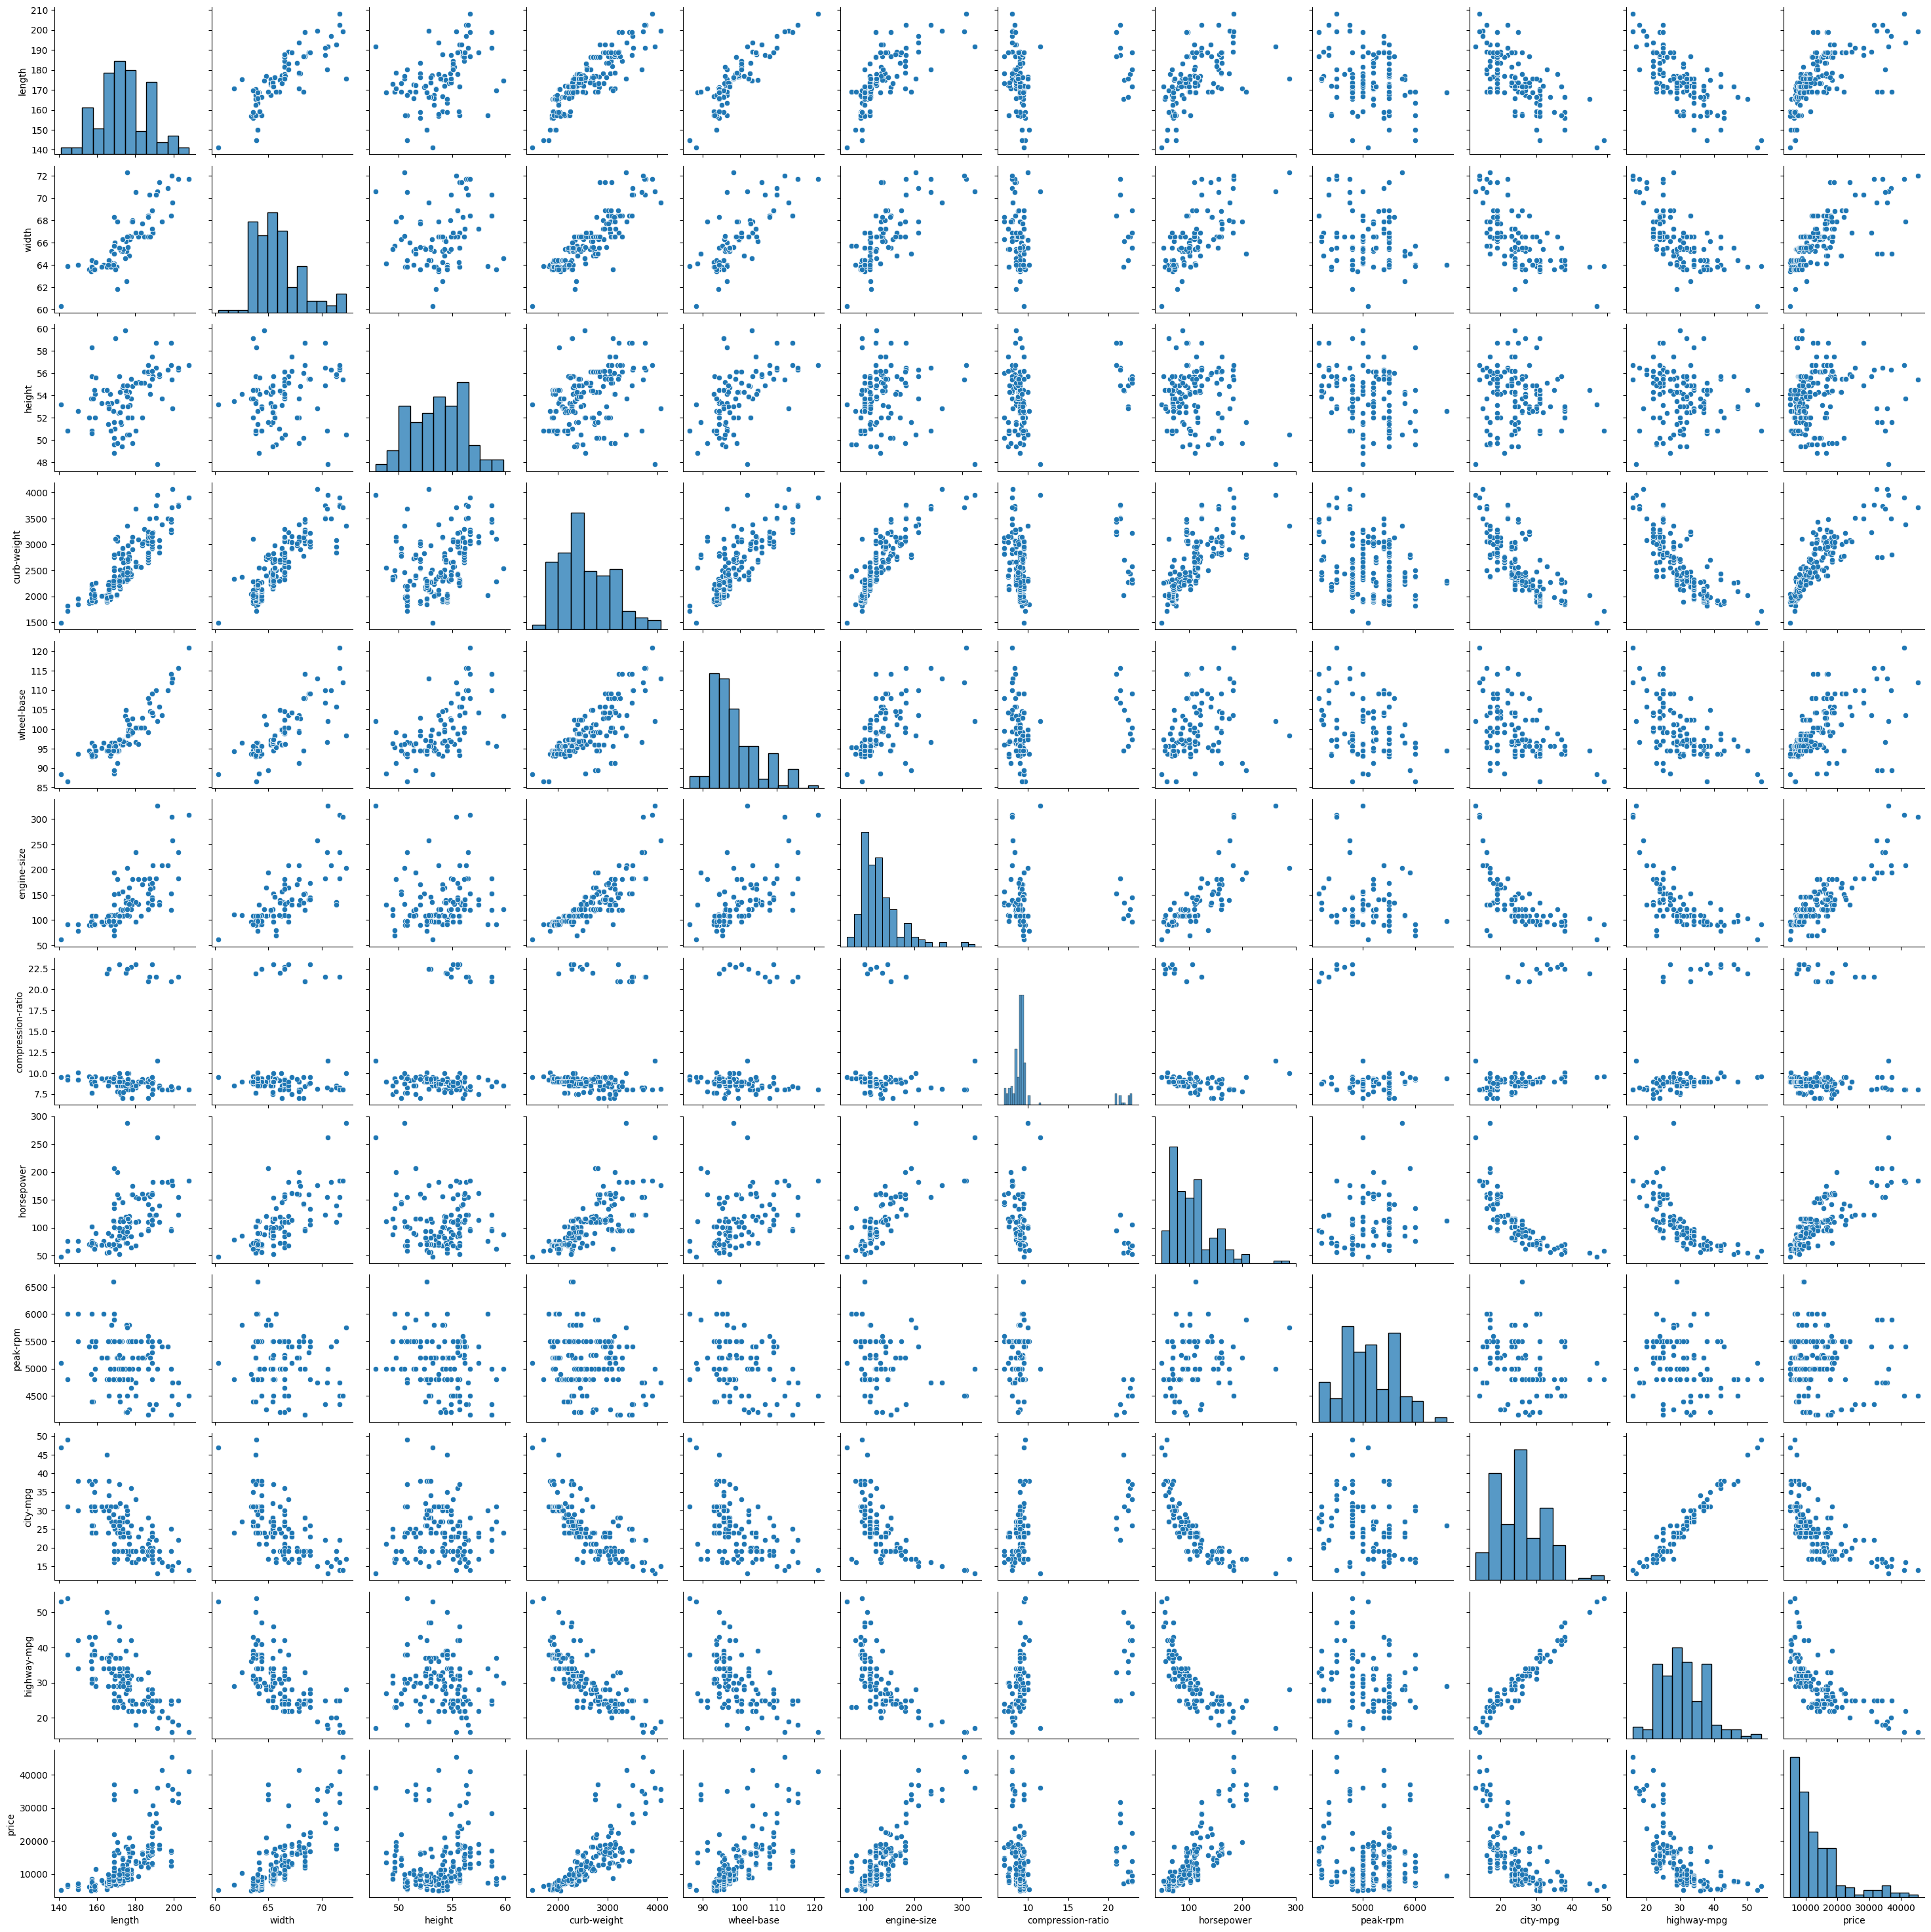

In [ ]:
df_continous_vars = df_no_losses[continous_cols]
sns.pairplot(df_continous_vars)

In [ ]:
df_continous_vars.describe()

,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,174.049268,65.907805,53.724878,2555.565854,98.756585,126.907317,10.142537,104.321951,5124.146341,25.219512,30.751220,13207.129353
std,12.337289,2.145204,2.443522,520.680204,6.021776,41.642693,3.972040,39.524797,477.139021,6.542142,6.886443,7947.066342
min,141.100000,60.300000,47.800000,1488.000000,86.600000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,166.300000,64.100000,52.000000,2145.000000,94.500000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,173.200000,65.500000,54.100000,2414.000000,97.000000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,183.100000,66.900000,55.500000,2935.000000,102.400000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,208.100000,72.300000,59.800000,4066.000000,120.900000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
display(train_data_encoded)
display(df_continous_vars)

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system
0,1,0,0,2,0,2,5
1,1,0,0,2,0,2,5
2,1,0,2,2,5,3,5
3,1,0,3,1,3,2,5
4,1,0,3,0,3,1,5
...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5
201,1,1,3,2,3,2,5
202,1,0,3,2,5,3,5
203,0,1,3,2,3,3,3


,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,13495.0
1,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,16500.0
2,171.2,65.5,52.4,2823.0,94.5,152.0,9.0,154.0,5000.0,19.0,26.0,16500.0
3,176.6,66.2,54.3,2337.0,99.8,109.0,10.0,102.0,5500.0,24.0,30.0,13950.0
4,176.6,66.4,54.3,2824.0,99.4,136.0,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952.0,109.1,141.0,9.5,114.0,5400.0,23.0,28.0,16845.0
201,188.8,68.8,55.5,3049.0,109.1,141.0,8.7,160.0,5300.0,19.0,25.0,19045.0
202,188.8,68.9,55.5,3012.0,109.1,173.0,8.8,134.0,5500.0,18.0,23.0,21485.0
203,188.8,68.9,55.5,3217.0,109.1,145.0,23.0,106.0,4800.0,26.0,27.0,22470.0


In [ ]:
df = pd.concat([train_data_encoded,df_continous_vars], axis = 1)

In [ ]:
df

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,curb-weight,wheel-base,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,0,0,2,0,2,5,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,0,0,2,0,2,5,168.8,64.1,48.8,2548.0,88.6,130.0,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,0,2,2,5,3,5,171.2,65.5,52.4,2823.0,94.5,152.0,9.0,154.0,5000.0,19.0,26.0,16500.0
3,1,0,3,1,3,2,5,176.6,66.2,54.3,2337.0,99.8,109.0,10.0,102.0,5500.0,24.0,30.0,13950.0
4,1,0,3,0,3,1,5,176.6,66.4,54.3,2824.0,99.4,136.0,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5,188.8,68.9,55.5,2952.0,109.1,141.0,9.5,114.0,5400.0,23.0,28.0,16845.0
201,1,1,3,2,3,2,5,188.8,68.8,55.5,3049.0,109.1,141.0,8.7,160.0,5300.0,19.0,25.0,19045.0
202,1,0,3,2,5,3,5,188.8,68.9,55.5,3012.0,109.1,173.0,8.8,134.0,5500.0,18.0,23.0,21485.0
203,0,1,3,2,3,3,3,188.8,68.9,55.5,3217.0,109.1,145.0,23.0,106.0,4800.0,26.0,27.0,22470.0


In [ ]:
initial_df = pd.read_csv(io.BytesIO(uploaded['cars.csv']))
brand = pd.get_dummies(initial_df['make'])

In [ ]:
df = pd.concat([df,brand], axis = 1)

In [ ]:
df_price_nan = df[df['price'].isna()]

In [ ]:
df_price_nan

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
9,1,1,2,0,3,1,5,178.2,67.9,52.0,...,0,0,0,0,0,0,0,0,0,0
44,1,0,3,1,3,2,1,155.9,63.6,52.0,...,0,0,0,0,0,0,0,0,0,0
45,1,0,3,1,3,2,1,155.9,63.6,52.0,...,0,0,0,0,0,0,0,0,0,0
129,1,0,2,2,1,0,5,175.7,72.3,50.5,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df.dropna(subset=['price'])

In [ ]:
df

,fuel-type,aspiration,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,length,width,height,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,2,0,2,5,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2,0,2,5,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2,2,5,3,5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,1,0,3,1,3,2,5,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,1,0,3,0,3,1,5,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,3,2,5,188.8,68.9,55.5,...,0,0,0,0,0,0,0,0,0,1
201,1,1,3,2,3,2,5,188.8,68.8,55.5,...,0,0,0,0,0,0,0,0,0,1
202,1,0,3,2,5,3,5,188.8,68.9,55.5,...,0,0,0,0,0,0,0,0,0,1
203,0,1,3,2,3,3,3,188.8,68.9,55.5,...,0,0,0,0,0,0,0,0,0,1


### ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn import tree

1 var regression

In [ ]:
# Podzial na zmienne zalezne i niezalezne
y = df['price']
X = df[['horsepower']]

y_price_nan = df_price_nan['price']
X_price_nan = df_price_nan[['horsepower']]

In [ ]:
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_test = pd.concat([X_test, X_price_nan], axis = 0)
y_test = pd.concat([y_test, y_price_nan], axis = 0)

# Podział zbioru treningowego na zbior treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [ ]:
reg_one_model = LinearRegression()
reg_one_model.fit(X_train, y_train)

pred_one_reg = reg_one_model.predict(X_val)

print('R2 Score:')
print(r2_score(y_val, pred_one_reg))

print('MAE')
print(mean_absolute_error(y_val, pred_one_reg))

R2 Score:
0.7701148032555771
MAE
2532.2507094721727


# Regresja liniowa wielu zmiennych

In [ ]:
# Podzial na zmienne zalezne i niezalezne
y = df['price']
X = df.drop(['price'], axis=1)

y_price_nan = df_price_nan['price']
X_price_nan = df_price_nan.drop(['price'], axis=1)

In [ ]:
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_test = pd.concat([X_test, X_price_nan], axis = 0)
y_test = pd.concat([y_test, y_price_nan], axis = 0)

# Podział zbioru treningowego na zbior treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

pred_reg = reg_model.predict(X_val)
train_reg = reg_model.predict(X_train)

print('R2 Score:')
print(reg_model.score(X, y))

print('MAE')
print(mean_absolute_error(y_val, pred_reg))
print(mean_absolute_error(y_train, train_reg))

R2 Score:
0.8545169410282447
MAE
1633.7961602931944
1037.535768528969


Drzewa decyzyjne

In [ ]:
# Podzial na zmienne zalezne i niezalezne
y = df['price']
X = df.drop(['price'], axis=1)

In [ ]:
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Podział zbioru treningowego na zbior treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [ ]:
tree_model = tree.DecisionTreeRegressor(min_samples_split=20, max_depth=5)
tree_model.fit(X_train, y_train)

pred_tree = tree_model.predict(X_val)

In [ ]:
# Sprawdzenie skuteczności modelu

tree_pred_train = tree_model.predict(X_train)     # Predykcja dla zbioru treningowego - predykcja dla obserwacji, które nasz model widział w trakcie uczenia
tree_pred_val = tree_model.predict(X_val)       # Predykcja dla zbioru testowego - predykcja dla obserwacji, których nasz model NIE widział w trakcie uczenia

# R2
print('R2 Score:')
print(r2_score(y_train, tree_pred_train))
print(r2_score(y_val, tree_pred_val))

print('')

print('MAE:')
# MAE
print(mean_absolute_error(y_train, tree_pred_train))
print(mean_absolute_error(y_val, tree_pred_val))

R2 Score:
0.9350759991845566
0.695720197315489

MAE:
1255.6228674742924
2207.532368236768


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV(tree_model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 60, 10)
                                },
                  cv=10,
                  scoring='neg_mean_absolute_error')
gs.fit(X_val,y_val)


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=5, min_samples_split=20),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)
print(-gs.best_score_)
max_depth = gs.best_params_['max_depth']
min_samples_split = gs.best_params_['min_samples_split']

{'max_depth': 9, 'min_samples_split': 10}
2531.3447982804237


In [ ]:
# Wytrenowanie modelu. Jaka wartość parametru?
model_tree = tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=10)

In [ ]:
# Ocena modelu na zbiorze walidacyjnym
y_pred = model_tree.predict(X_val)
mean_absolute_error(y_val, y_pred)

2008.7835441468255

In [ ]:
# Ocena modelu na zbiorze testowym
y_pred = model_tree.predict(X_test)
mean_absolute_error(y_test, y_pred)

2029.167653890825